Read data from the file

In [2]:
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import GroupShuffleSplit, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

houses_train = pd.read_csv('train.csv')
houses_test = pd.read_csv('test.csv')
X_test = houses_test.copy()
X = houses_train.copy()
Y = X.pop('SalePrice')
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (1460, 80)
Y shape:  (1460,)


Text(0.5, 0, 'Arena')

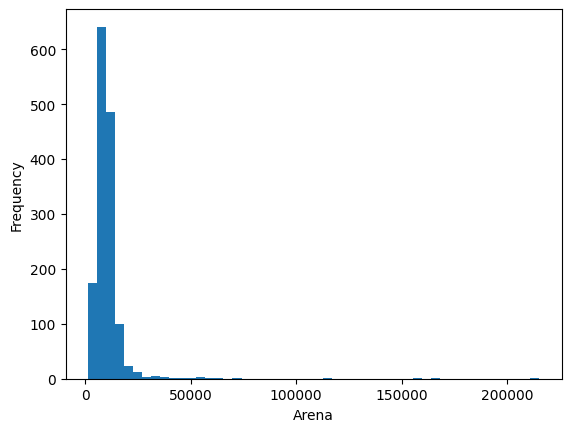

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.hist(X['LotArea'] , bins=50)
plt.ylabel('Frequency')
plt.xlabel('Arena')

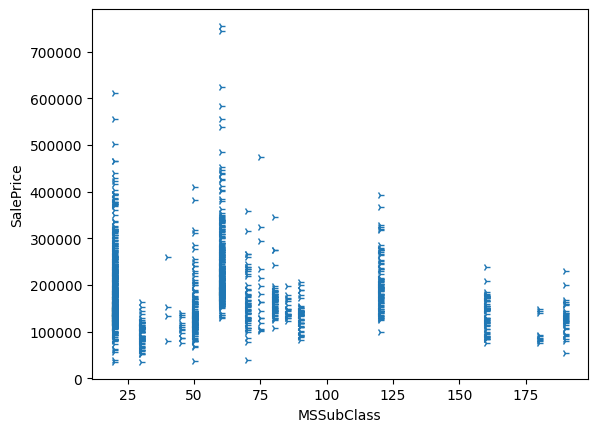

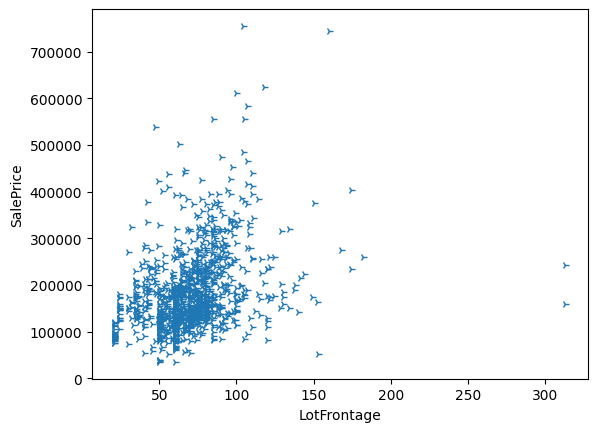

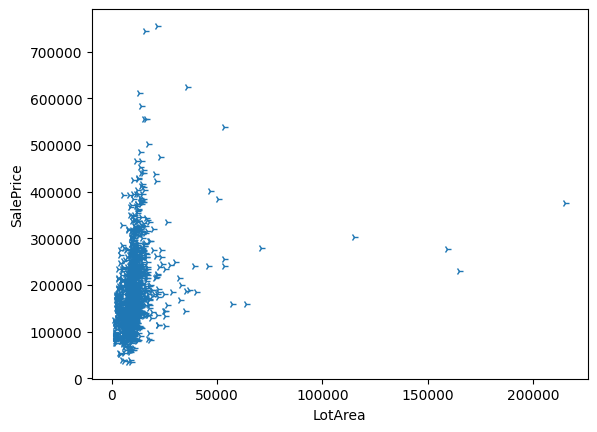

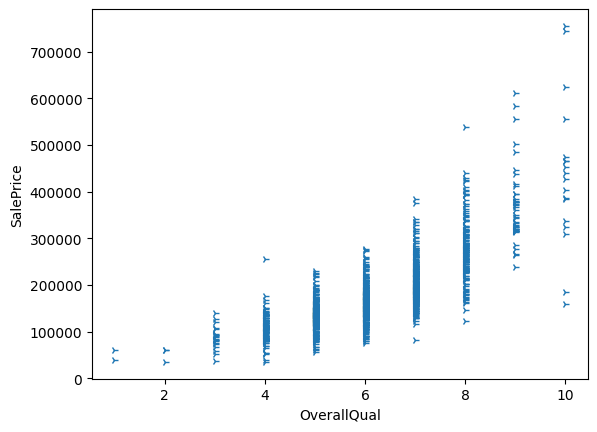

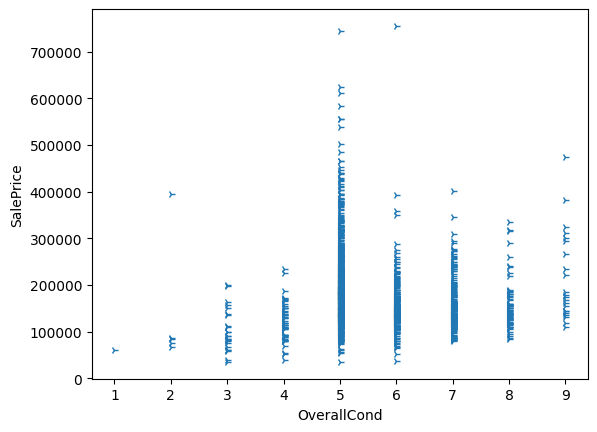

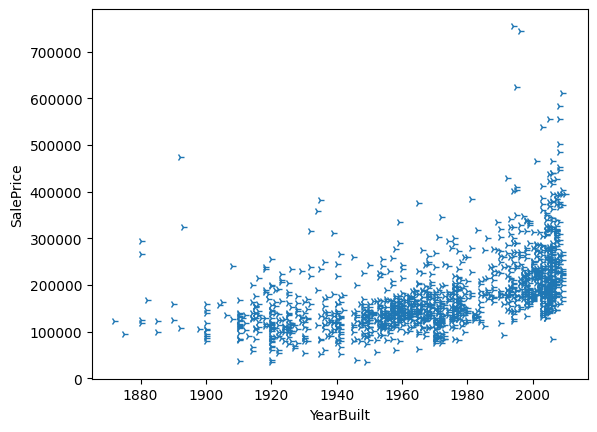

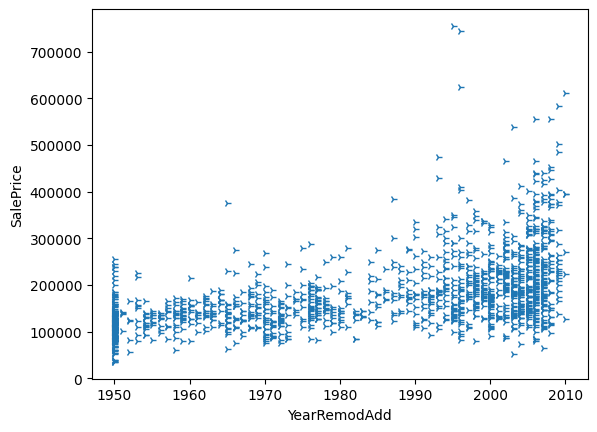

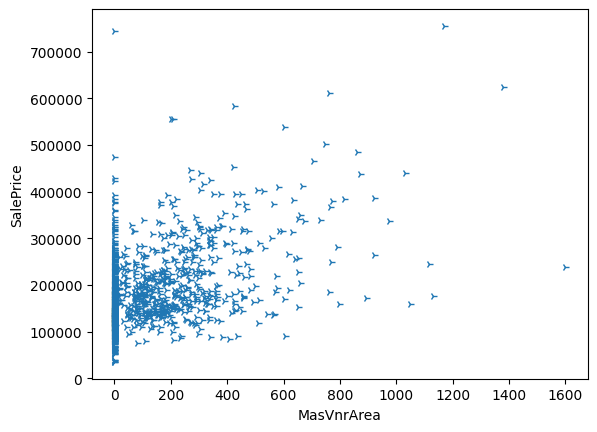

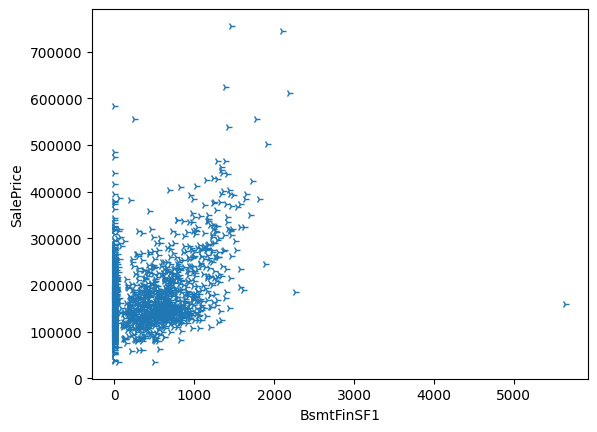

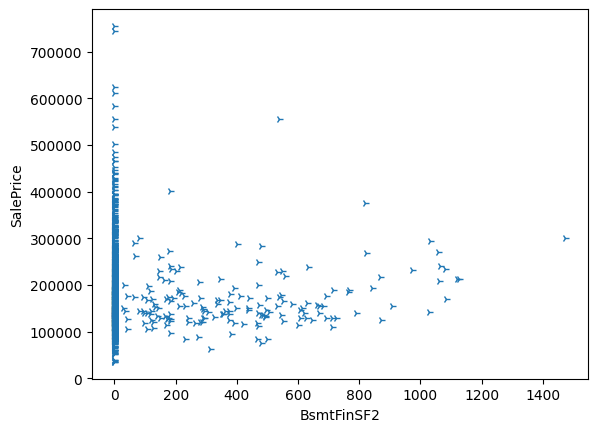

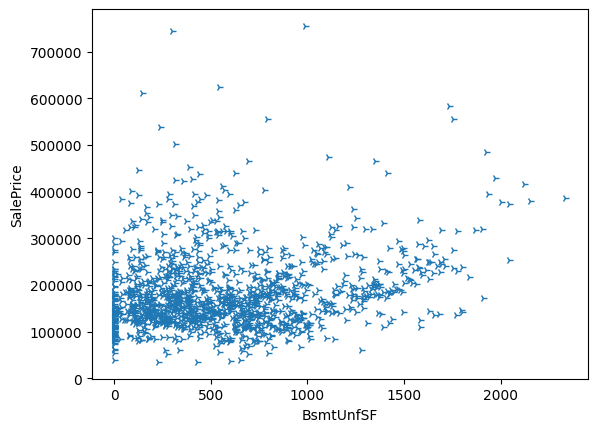

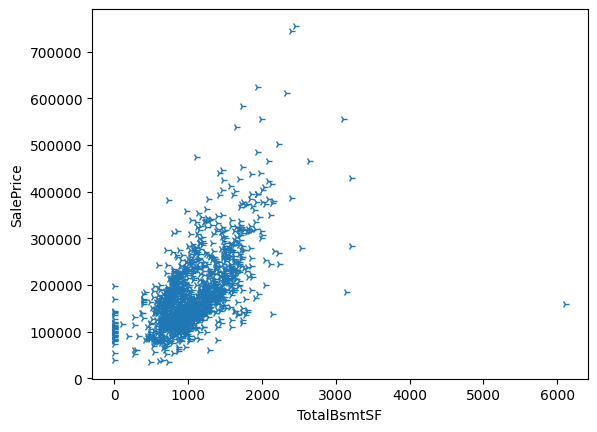

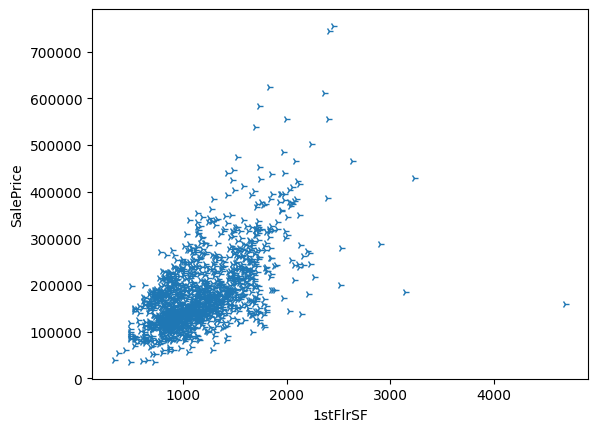

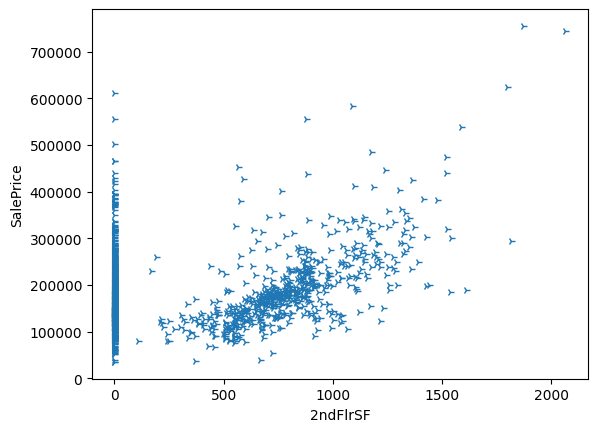

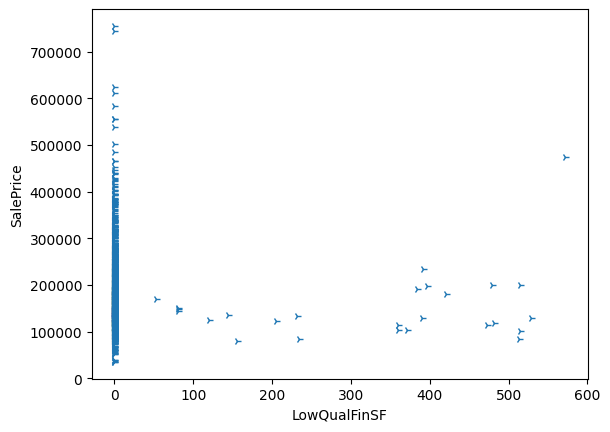

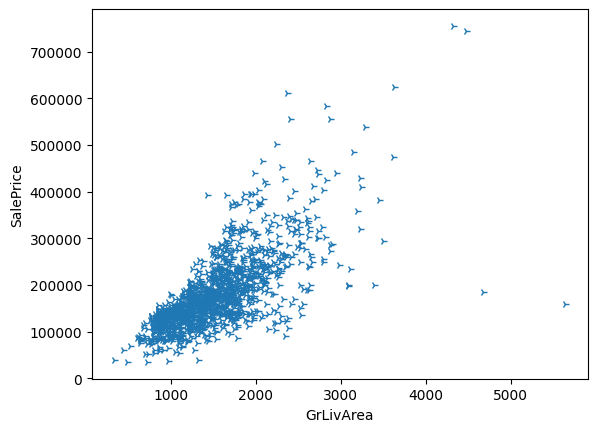

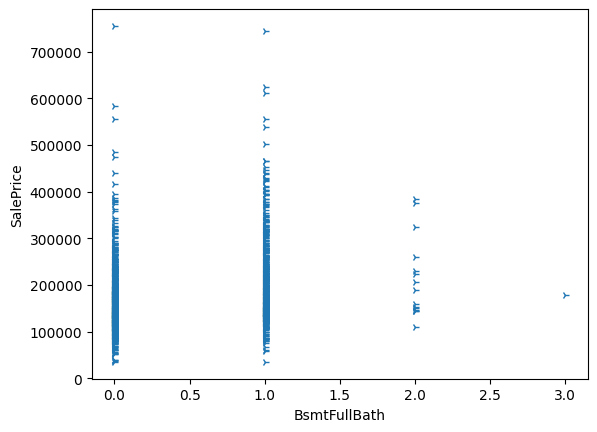

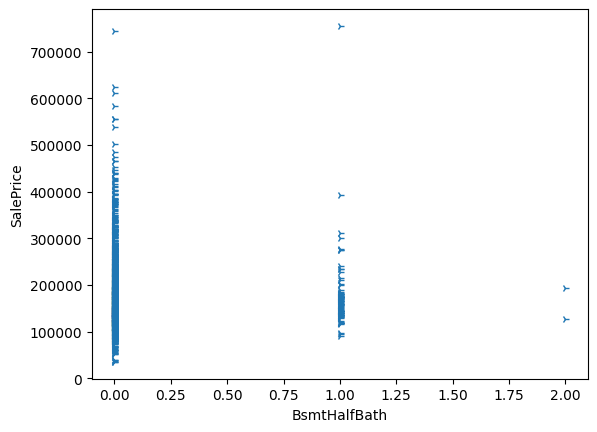

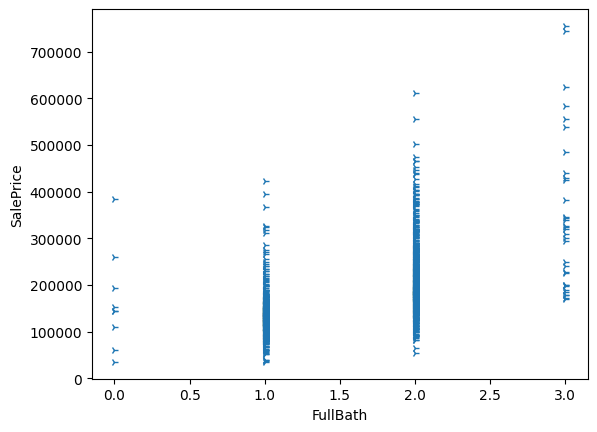

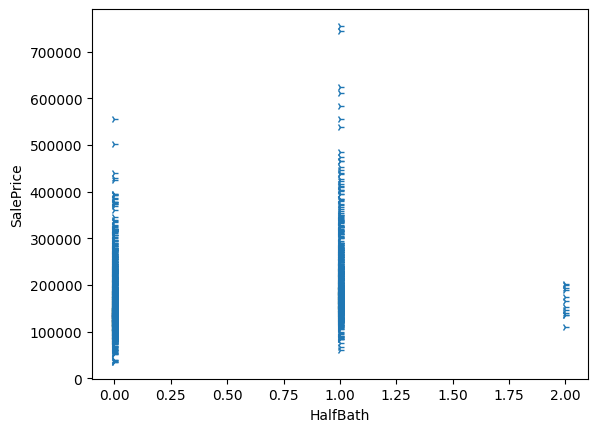

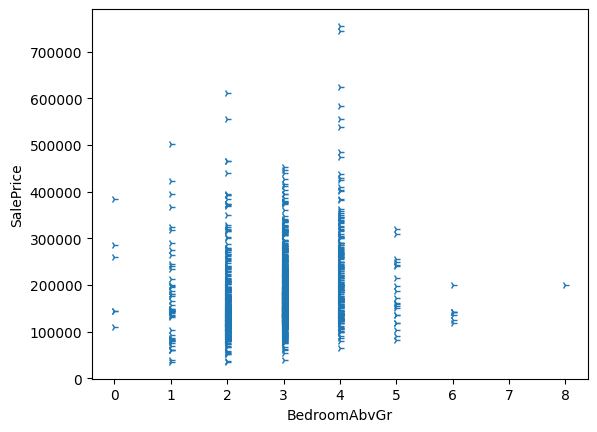

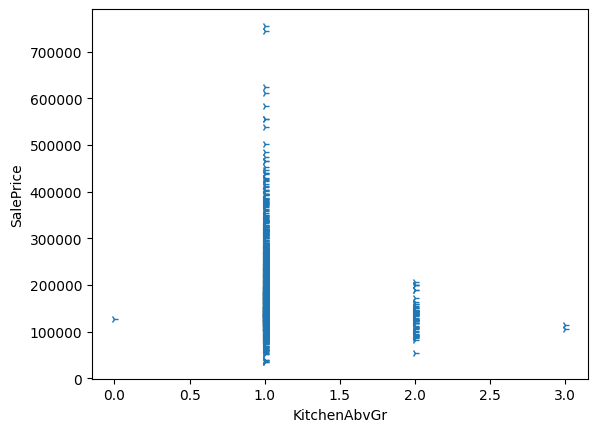

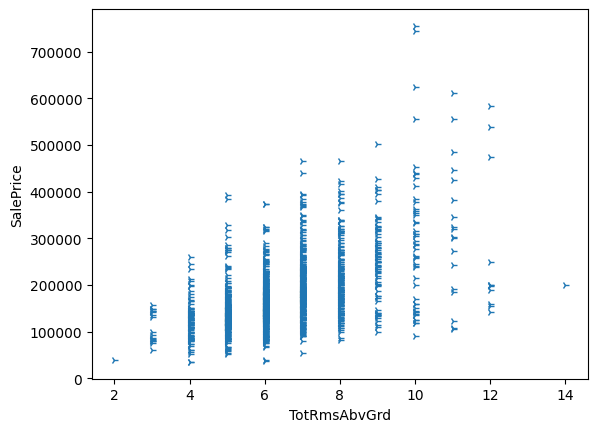

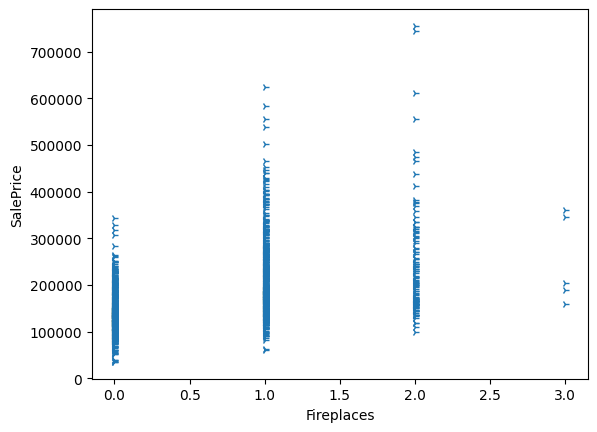

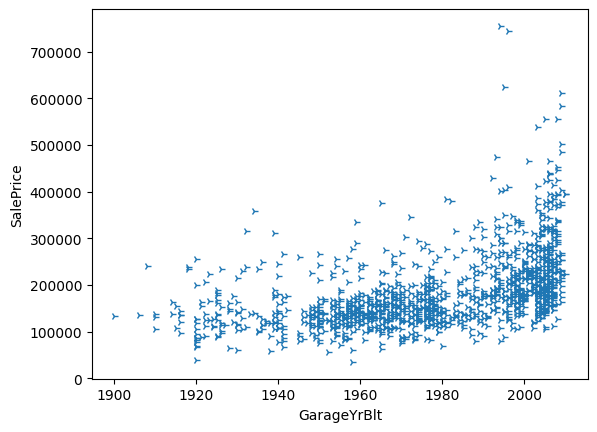

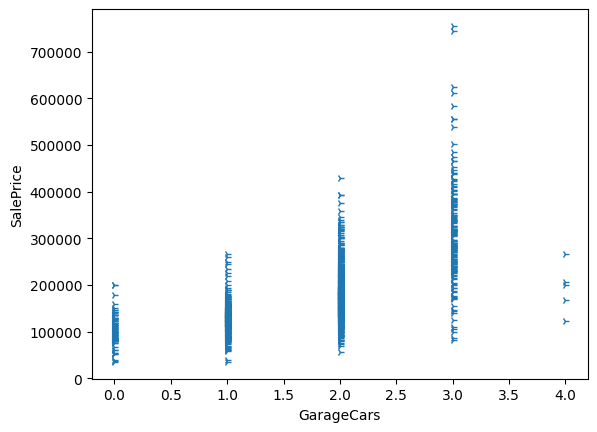

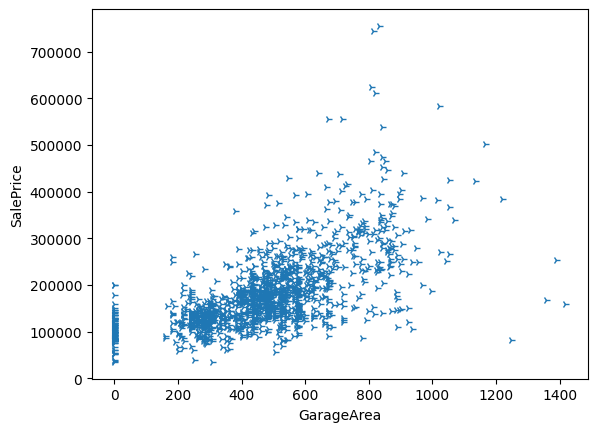

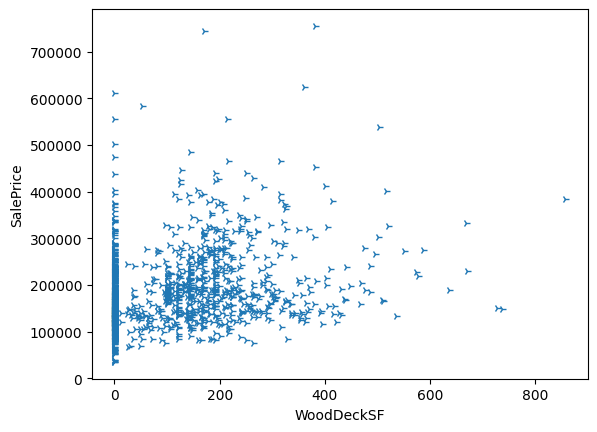

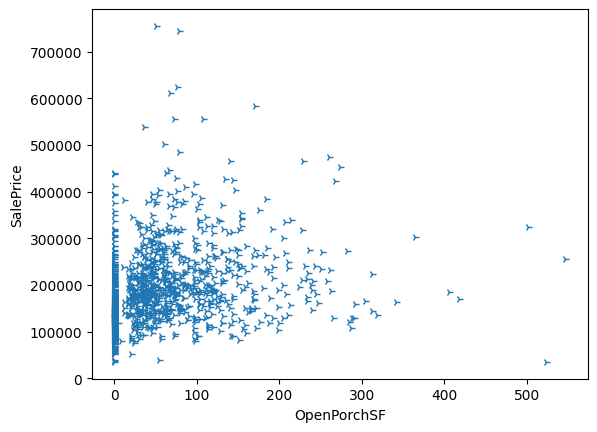

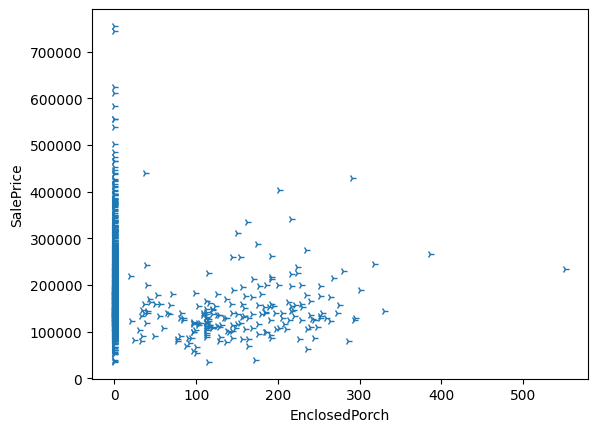

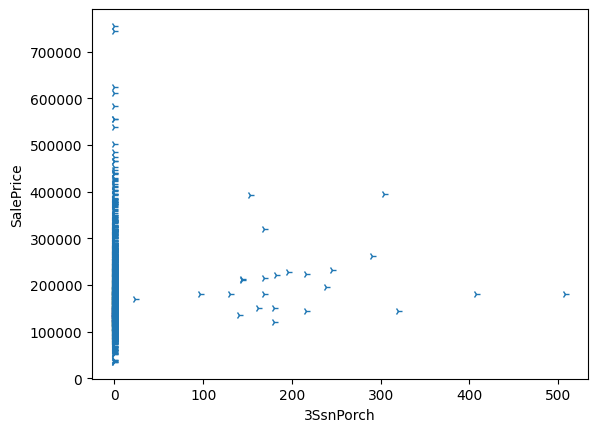

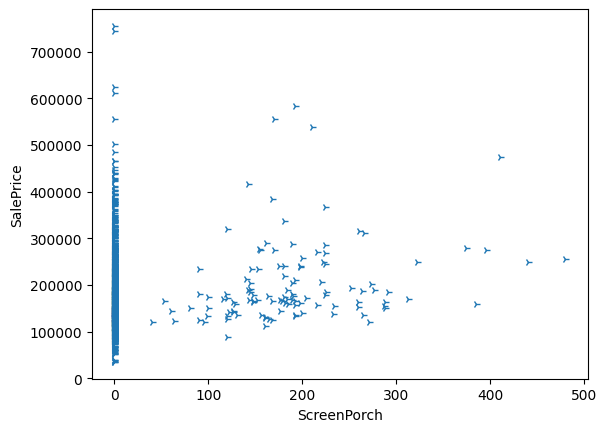

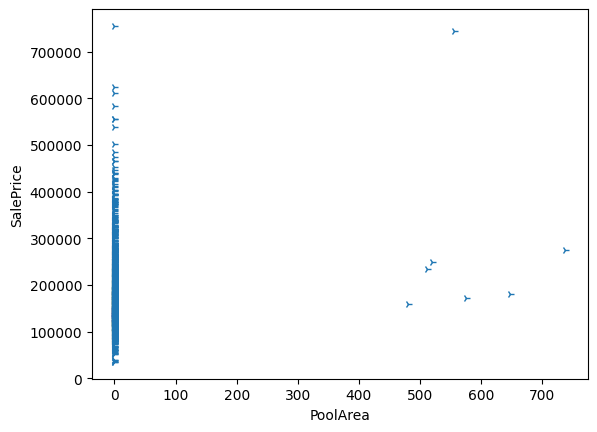

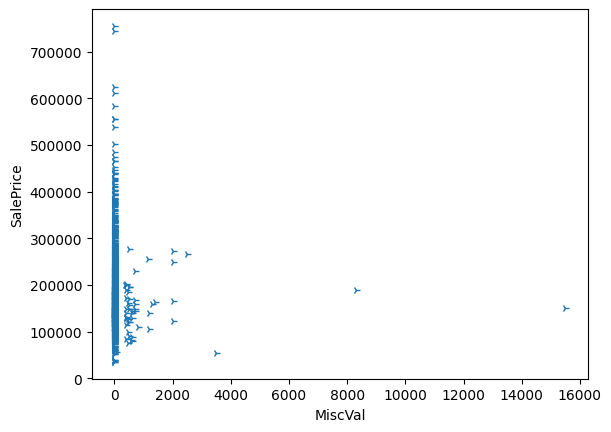

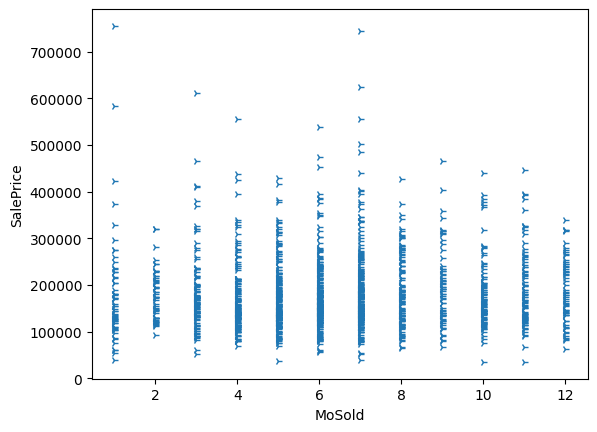

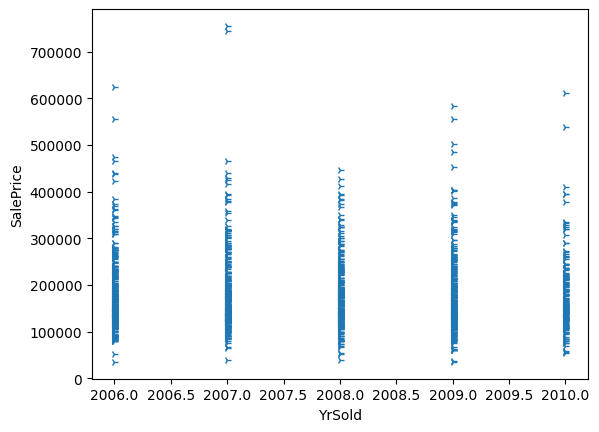

In [4]:
cols = []
for col in X.columns:
    if X[col].dtype == 'float64' or X[col].dtype == 'int64':
        cols.append(col)
cols.remove('Id')
# size = cols.__len__()
# rows = 4
# figure, axis  = plt.subplots(rows, size, figsize=(20, 10))
# for i in range(cols.__len__()):
#     row = i / (size/rows)
#     axis[row, i % size].plot(X[cols[i]], Y, linestyle = 'None',  marker='o')
#     axis[row, i % size].set_title(cols[i])
#     # axis[i].plot(X[cols[i]], Y, linestyle = 'None',  marker='o')
#     # axis[i].set_title(cols[i])

# plt.show()

for col in cols:
    plt.plot(X[col], Y, linestyle = 'None',  marker='4')
    plt.ylabel('SalePrice')
    plt.xlabel(col)
    plt.show()

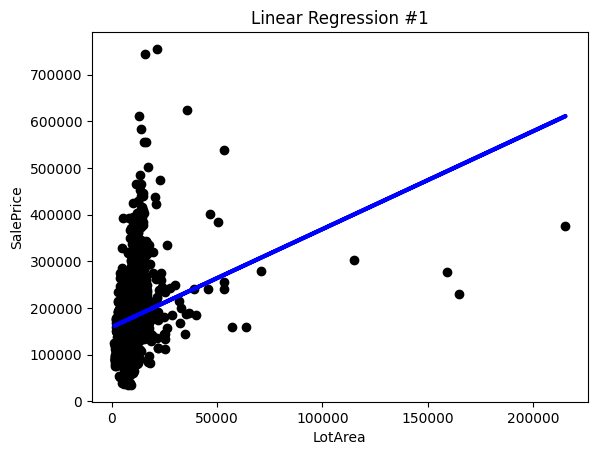

In [5]:
from sklearn.linear_model import LinearRegression
X_reshaped = X['LotArea'].values.reshape(-1, 1)
reg = LinearRegression().fit(X_reshaped, Y)
reg.score(X_reshaped, Y)
Y_predict = reg.predict(X_reshaped)
plt.scatter(X_reshaped, Y, color='black')
plt.plot(X_reshaped, Y_predict, color='blue', linewidth=3)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression #1')
Y_test = reg.predict(X_test['LotArea'].values.reshape(-1, 1)).round(2)
arr = np.concatenate((X_test['Id'].values.reshape(-1, 1).astype(int), Y_test.reshape(-1, 1)), axis=1)
np.savetxt("submission.csv", arr, fmt='%d,%1.5f', header='Id,SalePrice', comments='')

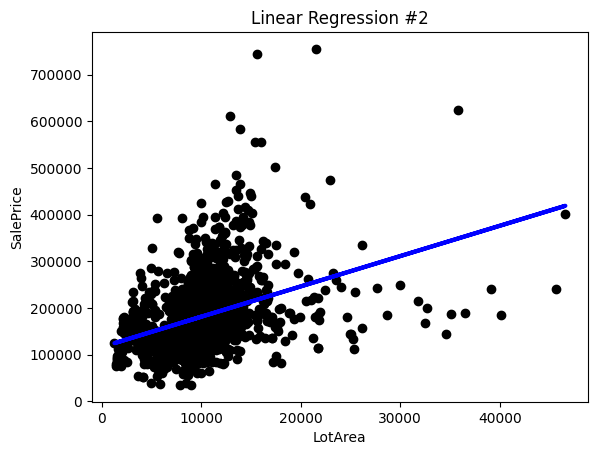

In [6]:

X_no_anomaly = houses_train.copy()
X_no_anomaly.drop(X_no_anomaly[X_no_anomaly.LotArea > 50000].index, inplace=True)
Y_no_anomaly = X_no_anomaly.pop('SalePrice')
X_reshaped = X_no_anomaly['LotArea'].values.reshape(-1, 1)
reg = LinearRegression().fit(X_reshaped, Y_no_anomaly)
reg.score(X_reshaped, Y_no_anomaly)
Y_predict = reg.predict(X_reshaped)
plt.scatter(X_reshaped, Y_no_anomaly, color='black')
plt.plot(X_reshaped, Y_predict, color='blue', linewidth=3)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression #2')
Y_test = reg.predict(X_test['LotArea'].values.reshape(-1, 1)).round(2)
arr = np.concatenate((X_test['Id'].values.reshape(-1, 1).astype(int), Y_test.reshape(-1, 1)), axis=1)
np.savetxt("submission2.csv", arr, fmt='%d,%1.5f', header='Id,SalePrice', comments='')

In [31]:
# import feature_columns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.feature_column import *
enc = OrdinalEncoder(encoded_missing_value=-1)
X_tf = X.copy()
Y_tf = Y.copy()
X_tf.pop('Id')
for col in X_tf.columns:
    if X_tf[col].dtype == 'object':
        X_tf.drop(col, axis=1, inplace=True)
X_tf = X_tf['LotArea'].values.reshape(-1, 1)
feature_columns=[numeric_column('LotArea')]
feature_layer = layers.DenseFeatures(feature_columns)
feature_layer(dict({'LotArea': 100}))
# Predition with neural network
# model = keras.Sequential([
#     layers.Dense(1, activation='linear', input_shape=[1]),
# ])

# X_train, X_val, Y_train, Y_val = train_test_split(X_tf, Y_tf, test_size=0.2)
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.3),
#     loss='mae',
#     metrics=['mae']
# )
# early_stopping = callbacks.EarlyStopping(
#     min_delta=0.001,
#     patience=20,
#     restore_best_weights=True,
# )
# history = model.fit(
#     X_train, Y_train,
#     validation_data=(X_val, Y_val),
#     batch_size=1024, 
#     epochs=100,
#     callbacks=[early_stopping],
#     verbose=0,
# )
# history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot()

ValueError: Exception encountered when calling layer 'dense_features_7' (type DenseFeatures).

Feature (key: LotArea) cannot have rank 0. Given: 100

Call arguments received by layer 'dense_features_7' (type DenseFeatures):
  • features={'LotArea': 'tf.Tensor(shape=(), dtype=int32)'}
  • cols_to_output_tensors=None
  • training=None

46/46 [==============================] - 0s 1ms/step


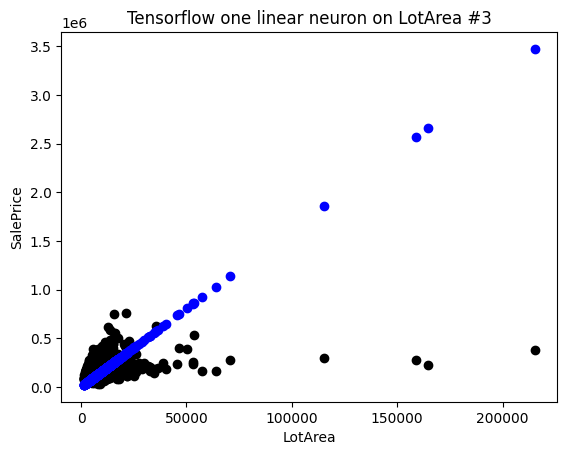

In [16]:


plt.scatter(X_tf, Y_tf, color='black', label='LotArea')
plt.scatter(X_tf, model.predict(X_tf), color='blue')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Tensorflow one linear neuron on LotArea #3')
Y_test = model.predict(X_test['LotArea'].values.reshape(-1, 1)).round(2)
arr = np.concatenate((X_test['Id'].values.reshape(-1, 1).astype(int), Y_test.reshape(-1, 1)), axis=1)
np.savetxt("submission3.csv", arr, fmt='%d,%1.5f', header='Id,SalePrice', comments='')
